In [3]:
from dotenv import load_dotenv
load_dotenv()
import os
from langchain_openai import ChatOpenAI

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages
#from langchain_groq import ChatGroq

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
#os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


#llm=ChatGroq(model="qwen-qwq-32b")
llm = ChatOpenAI(model="gpt-4o")
result=llm.invoke("Hello")
result


AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BshGciZ4IIrybDuoaZOby5ikpOVY5', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--5cddcc9f-378a-41ab-8728-09b822fd882c-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

### We Will start With Creating Nodes

In [5]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [6]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()
def superbot(state:State):
    return {"messages":[llm.invoke(state['messages'])]}

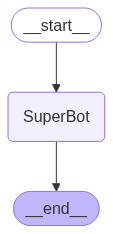

In [7]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile(checkpointer=memory)


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [8]:
## Invocation

config = {"configurable": {"thread_id": "1"}}

graph_builder.invoke({'messages':"Hi,My name is Krish And I like cricket"},config)

{'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', additional_kwargs={}, response_metadata={}, id='10e7fc4d-249f-45b3-90d8-26eaa20f0894'),
  AIMessage(content="Hi Krish! It's great to meet you. Cricket is a fantastic sport with a rich history and a lot of excitement. Do you have a favorite team or player?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 34, 'prompt_tokens': 18, 'total_tokens': 52, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': None, 'id': 'chatcmpl-BshHI3qV3lnJfLNBO8Mmdp4woEYMg', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--e354aeb4-216f-4596-99e8-1559625c4bff-0', usage_metadata={'input_tokens': 18, 'output_tokens': 34, 'total_tokens': 52, 'input_token

### Streaming 
Methods: .stream() and astream()

- These methods are sync and async methods for streaming back results.

Additional parameters in streaming modes for graph state

- **values** : This streams the full state of the graph after each node is called.
- **updates** : This streams updates to the state of the graph after each node is called.


#### Streaming The Responses With Stream Method

In [9]:
# Create a thread
config = {"configurable": {"thread_id": "3"}}

for chunk in graph_builder.stream({'messages':"Hi,My name is Krish And I like cricket"},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="Hi Krish! It's great to meet you. Cricket is an exciting sport with a lot of strategy and skill. Do you have a favorite team or player?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 32, 'prompt_tokens': 18, 'total_tokens': 50, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BshHwMo3UKHoAsaUtEiKjjFlo6NAt', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--f42313c2-30a3-49e1-8f56-c6156344f7dc-0', usage_metadata={'input_tokens': 18, 'output_tokens': 32, 'total_tokens': 50, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}}


In [10]:
for chunk in graph_builder.stream({'messages':"I also like football"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', additional_kwargs={}, response_metadata={}, id='f078222d-b928-4ee8-ab1f-8691e4f6e667'), AIMessage(content="Hi Krish! It's great to meet you. Cricket is an exciting sport with a lot of strategy and skill. Do you have a favorite team or player?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 32, 'prompt_tokens': 18, 'total_tokens': 50, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BshHwMo3UKHoAsaUtEiKjjFlo6NAt', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--f42313c2-30a3-49e1-8f56-c6156344f7dc-0', usage_metadata={'input_tokens': 18, 'output_tokens': 32, 'total_tokens': 50, 'input_token_d

In [11]:
for chunk in graph_builder.stream({'messages':"I also like football "},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="That's great to hear, Krish! Enjoying both cricket and football gives you a lot of exciting matches and moments to look forward to. Do you play either sport, or do you prefer watching them?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 41, 'prompt_tokens': 103, 'total_tokens': 144, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': None, 'id': 'chatcmpl-BshIglxfVJGtWpF2aTbSFWFWdgmuW', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--82c9f7ff-45e7-4982-a63f-7766e06f2079-0', usage_metadata={'input_tokens': 103, 'output_tokens': 41, 'total_tokens': 144, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0

In [12]:
for chunk in graph_builder.stream({'messages':"I Love sports "},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', additional_kwargs={}, response_metadata={}, id='f078222d-b928-4ee8-ab1f-8691e4f6e667'), AIMessage(content="Hi Krish! It's great to meet you. Cricket is an exciting sport with a lot of strategy and skill. Do you have a favorite team or player?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 32, 'prompt_tokens': 18, 'total_tokens': 50, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BshHwMo3UKHoAsaUtEiKjjFlo6NAt', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--f42313c2-30a3-49e1-8f56-c6156344f7dc-0', usage_metadata={'input_tokens': 18, 'output_tokens': 32, 'total_tokens': 50, 'input_token_d

#### Streaming The Responses With astream Method

**Streaming tokens**
We often want to stream more than graph state.

In particular, with chat model calls it is common to stream the **tokens** as they are generated.

We can do this using the .astream_events method, which streams back events as they happen inside nodes!

Each event is a dict with a few keys:

- event: This is the type of event that is being emitted.
- name: This is the name of event.
- data: This is the data associated with the event.
- metadata: Containslanggraph_node, the node emitting the event.

In [13]:
config = {"configurable": {"thread_id": "3"}}

async for event in graph_builder.astream_events({"messages":["Hi My name is Krish and I like to play cricket"]},config,version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi My name is Krish and I like to play cricket']}}, 'name': 'LangGraph', 'tags': [], 'run_id': '9819d074-e14e-47c3-9dcb-972ab2a56085', 'metadata': {'thread_id': '3'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', additional_kwargs={}, response_metadata={}, id='f078222d-b928-4ee8-ab1f-8691e4f6e667'), AIMessage(content="Hi Krish! It's great to meet you. Cricket is an exciting sport with a lot of strategy and skill. Do you have a favorite team or player?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 32, 'prompt_tokens': 18, 'total_tokens': 50, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system